<b>Null Hypothesis:</b> There is no difference between the Performance of Random Forest Model, Elastic Net Regression, XGBoost,
    and Gradient Boosting Model on Walmart Retail Data.<br>
<b>Alternate Hypothesis:</b> There is a difference between the Performance of Random Forest Model, Elastic Net Regression, XGBoost,and Gradient Boosting Model on Walmart Retail Data.

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# <u>PreProcessing Phase</u>

## <u>Reading all the Files</u>

In [287]:
data = pd.read_csv('train.csv')
feature = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [288]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [289]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [290]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [291]:
feature = feature.merge(stores, on = 'Store')

## <u>Data Cleaning</u>

In [292]:
# Converting to datetime Object
feature['Date'] = pd.to_datetime(feature['Date'],format = '%Y-%m-%d')
data['Date'] = pd.to_datetime(data['Date'],format = '%Y-%m-%d')

In [293]:
# Merging all the Data
Train_detail = data.merge(feature, 
                           how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [294]:
Train_detail

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [295]:
# Checking for null values
Train_detail.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

##### <i>Dropping columns 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'  as we don't require it our analysis and it contains a lot of Null Values</i>

In [296]:
Train_detail.drop(columns = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],inplace = True)

In [297]:
Train_detail

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [298]:
Train_detail.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

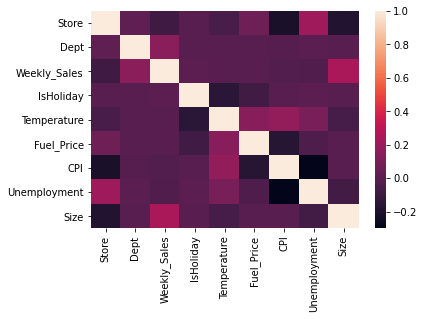

In [299]:
# Correlation betweeen different Values
correlation = Train_detail.corr()
sns.heatmap(correlation)
plt.show()

In [300]:
Train_detail

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [301]:
Train_detail.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [302]:
Evaluate = Train_detail[['Store','Dept','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Type','Size','Weekly_Sales']]

In [303]:
# Rounding the Weekly Sales values to get a better prediction
Evaluate['Weekly_Sales'] = np.round(Evaluate['Weekly_Sales'])

<ipython-input-303-f267ab124aee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Evaluate['Weekly_Sales'] = np.round(Evaluate['Weekly_Sales'])


In [304]:
Evaluate

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
0,1,1,False,42.31,2.572,211.096358,8.106,A,151315,24924.0
1,1,1,True,38.51,2.548,211.242170,8.106,A,151315,46039.0
2,1,1,False,39.93,2.514,211.289143,8.106,A,151315,41596.0
3,1,1,False,46.63,2.561,211.319643,8.106,A,151315,19404.0
4,1,1,False,46.50,2.625,211.350143,8.106,A,151315,21828.0
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,False,64.88,3.997,192.013558,8.684,B,118221,508.0
421566,45,98,False,64.89,3.985,192.170412,8.667,B,118221,628.0
421567,45,98,False,54.47,4.000,192.327265,8.667,B,118221,1061.0
421568,45,98,False,56.47,3.969,192.330854,8.667,B,118221,760.0


In [305]:
list1 = Evaluate['Weekly_Sales'].loc[Evaluate['Weekly_Sales'] < 0].index
rows = Evaluate.index[list1]
Evaluate.drop(rows, inplace=True)

C:\Users\satyaki dixit\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [306]:
Evaluate = Evaluate.reset_index()

In [307]:
Evaluate.drop(['index'] ,axis = 1, inplace = True)

In [308]:
Evaluate

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
0,1,1,False,42.31,2.572,211.096358,8.106,A,151315,24924.0
1,1,1,True,38.51,2.548,211.242170,8.106,A,151315,46039.0
2,1,1,False,39.93,2.514,211.289143,8.106,A,151315,41596.0
3,1,1,False,46.63,2.561,211.319643,8.106,A,151315,19404.0
4,1,1,False,46.50,2.625,211.350143,8.106,A,151315,21828.0
...,...,...,...,...,...,...,...,...,...,...
420299,45,98,False,64.88,3.997,192.013558,8.684,B,118221,508.0
420300,45,98,False,64.89,3.985,192.170412,8.667,B,118221,628.0
420301,45,98,False,54.47,4.000,192.327265,8.667,B,118221,1061.0
420302,45,98,False,56.47,3.969,192.330854,8.667,B,118221,760.0


In [309]:
# Checking Column Type
Evaluate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420304 entries, 0 to 420303
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420304 non-null  int64  
 1   Dept          420304 non-null  int64  
 2   IsHoliday     420304 non-null  bool   
 3   Temperature   420304 non-null  float64
 4   Fuel_Price    420304 non-null  float64
 5   CPI           420304 non-null  float64
 6   Unemployment  420304 non-null  float64
 7   Type          420304 non-null  object 
 8   Size          420304 non-null  int64  
 9   Weekly_Sales  420304 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 29.3+ MB


In [310]:
# Checking for Null Values
Evaluate.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Weekly_Sales    0
dtype: int64

In [311]:
Evaluate.iloc[:,0:9]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...
420299,45,98,False,64.88,3.997,192.013558,8.684,B,118221
420300,45,98,False,64.89,3.985,192.170412,8.667,B,118221
420301,45,98,False,54.47,4.000,192.327265,8.667,B,118221
420302,45,98,False,56.47,3.969,192.330854,8.667,B,118221


In [312]:
max(Evaluate['Weekly_Sales'])

693099.0

In [313]:
value_between_0_and_1 = Evaluate['Weekly_Sales'].loc[Evaluate['Weekly_Sales'] <= 1].index

In [314]:
rows = Evaluate.index[value_between_0_and_1]
Evaluate.drop(rows, inplace=True)

In [315]:
Evaluate = Evaluate.reset_index()
Evaluate.drop(['index'],axis = 1, inplace = True)

In [316]:
Evaluate

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
0,1,1,False,42.31,2.572,211.096358,8.106,A,151315,24924.0
1,1,1,True,38.51,2.548,211.242170,8.106,A,151315,46039.0
2,1,1,False,39.93,2.514,211.289143,8.106,A,151315,41596.0
3,1,1,False,46.63,2.561,211.319643,8.106,A,151315,19404.0
4,1,1,False,46.50,2.625,211.350143,8.106,A,151315,21828.0
...,...,...,...,...,...,...,...,...,...,...
419232,45,98,False,64.88,3.997,192.013558,8.684,B,118221,508.0
419233,45,98,False,64.89,3.985,192.170412,8.667,B,118221,628.0
419234,45,98,False,54.47,4.000,192.327265,8.667,B,118221,1061.0
419235,45,98,False,56.47,3.969,192.330854,8.667,B,118221,760.0


In [317]:
# Replacing Type A,B,C with 0,1,2
Evaluate['Type'].replace(['A'],0, inplace = True)
Evaluate['Type'].replace(['B'],1, inplace = True)
Evaluate['Type'].replace(['C'],2, inplace = True)

In [318]:
Evaluate.drop(['IsHoliday'] ,axis = 1,inplace = True)

In [319]:
Evaluate

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Weekly_Sales
0,1,1,42.31,2.572,211.096358,8.106,0,151315,24924.0
1,1,1,38.51,2.548,211.242170,8.106,0,151315,46039.0
2,1,1,39.93,2.514,211.289143,8.106,0,151315,41596.0
3,1,1,46.63,2.561,211.319643,8.106,0,151315,19404.0
4,1,1,46.50,2.625,211.350143,8.106,0,151315,21828.0
...,...,...,...,...,...,...,...,...,...
419232,45,98,64.88,3.997,192.013558,8.684,1,118221,508.0
419233,45,98,64.89,3.985,192.170412,8.667,1,118221,628.0
419234,45,98,54.47,4.000,192.327265,8.667,1,118221,1061.0
419235,45,98,56.47,3.969,192.330854,8.667,1,118221,760.0


## <u>Scaling</u>

In [320]:
scale = StandardScaler()
scale.fit(Evaluate)

StandardScaler()

In [321]:
first_part = Evaluate.iloc[:,:].reset_index().drop(columns = ['index'])

In [322]:
train_x, test_x, train_y,test_y = train_test_split(first_part.iloc[:,0:8], first_part['Weekly_Sales'], test_size=0.30, random_state=42)

In [323]:
train_x

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
368818,39,98,73.19,3.743,214.026217,8.300,0,184109
372037,40,25,27.84,2.747,131.637000,5.892,0,155083
268299,28,21,53.77,2.987,126.578286,13.975,0,206302
256669,27,9,69.65,3.937,140.273500,7.850,0,204184
77617,8,93,33.34,2.548,214.621419,6.299,0,155078
...,...,...,...,...,...,...,...,...
259178,27,28,30.83,3.255,136.525571,8.021,0,204184
365838,39,59,84.31,2.619,210.329211,8.360,0,184109
131932,14,33,77.84,2.783,182.260441,8.743,0,200898
146867,15,95,45.67,3.666,136.490933,7.866,1,123737


In [324]:
train_y

368818     9286.0
372037     6190.0
268299     7141.0
256669    25200.0
77617     25200.0
           ...   
259178     1561.0
365838      618.0
131932     8057.0
146867    23912.0
121958     1867.0
Name: Weekly_Sales, Length: 293465, dtype: float64

# <u>Learning Phase </u>

## <u>Models_Selected</u>

## Random Forest Algorithm

In [325]:
regr = RandomForestRegressor(max_depth=10, random_state=20, n_estimators = 100)

In [326]:
# fitting the data into the model
regr.fit(train_x,train_y)

RandomForestRegressor(max_depth=10, random_state=20)

In [327]:
feature_imp = pd.Series(regr.feature_importances_,index=['Store','Dept','Temperature','Fuel_Price','CPI','Unemployment','Type','Size']).sort_values(ascending=False)

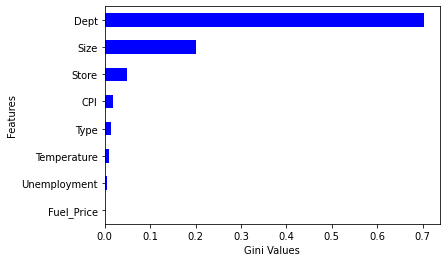

In [328]:
# Calculating the Feature importance
feature_imp.sort_values().plot.barh(color = 'blue' )
plt.xlabel('Gini Values')
plt.ylabel('Features')
plt.show()

In [329]:
feature_imp.sort_values(ascending = False)

Dept            0.702014
Size            0.201962
Store           0.048271
CPI             0.017335
Type            0.014824
Temperature     0.008987
Unemployment    0.005011
Fuel_Price      0.001596
dtype: float64

In [330]:
regr.fit(mod_train_x,train_y)

RandomForestRegressor(max_depth=10, random_state=20)

In [331]:
regr.estimators_[0].tree_.max_depth

10

In [332]:
mod_train_x.columns

Index(['Dept', 'Size'], dtype='object')

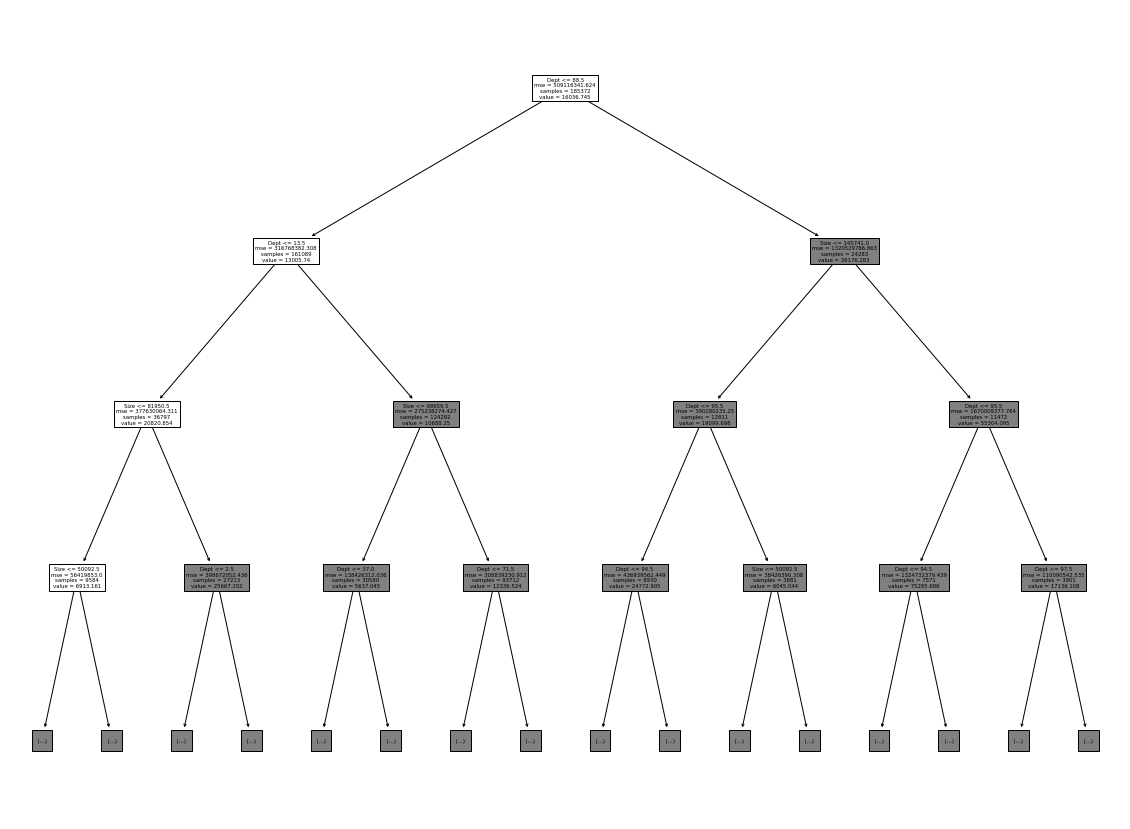

In [333]:
plt.figure(figsize=(20,15))
tree.plot_tree(regr.estimators_[0], feature_names = mod_train_x.columns , max_depth = 3)
plt.show()

In [334]:
pred_y = regr.predict(mod_train_x)

In [335]:
mod_test_x = test_x.drop(['Store','Type','Unemployment','Fuel_Price','Temperature','CPI'], axis = 1)

In [336]:
pred_y2 = regr.predict(mod_test_x)

In [337]:
# r2score_test
l=r2_score(test_y,pred_y2)

In [338]:
# r2score_train
m=r2_score(train_y,pred_y)

In [339]:
# mean_absolute_error
n=mean_absolute_error(test_y,pred_y2)

In [340]:
# root_mean_square_error
from sklearn import metrics
h=np.sqrt(metrics.mean_squared_error(test_y,pred_y2))

## Gradient Boosting Algorithm

In [341]:
model = GradientBoostingRegressor()

In [342]:
# fitting the data into the model
model.fit(train_x,train_y)

GradientBoostingRegressor()

In [344]:
feature_imp = pd.Series(model.feature_importances_,index=['Store','Dept','Temperature','Fuel_Price','CPI','Unemployment','Type','Size']).sort_values(ascending=False)

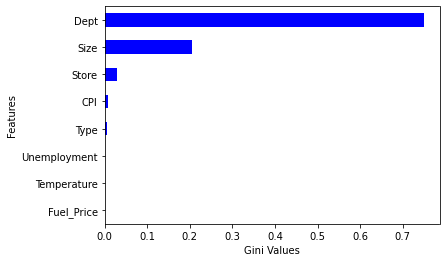

In [345]:
#getting the feature Importance
feature_imp.sort_values().plot.barh(color = 'blue' )
plt.xlabel('Gini Values')
plt.ylabel('Features')
plt.show()

In [346]:
feature_imp.sort_values(ascending = False)

Dept            0.748928
Size            0.205090
Store           0.029678
CPI             0.008890
Type            0.005290
Unemployment    0.001276
Temperature     0.000779
Fuel_Price      0.000068
dtype: float64

In [347]:
mod_train =  train_x.drop(['Type','Unemployment','Fuel_Price','Temperature','CPI'], axis = 1)
mod_test = test_x.drop(['Type','Unemployment','Fuel_Price','Temperature','CPI'], axis = 1)

In [348]:
model.fit(mod_train,train_y)

GradientBoostingRegressor()

In [349]:
y_pred2 = model.predict(mod_train)
y_pred = model.predict(mod_test)

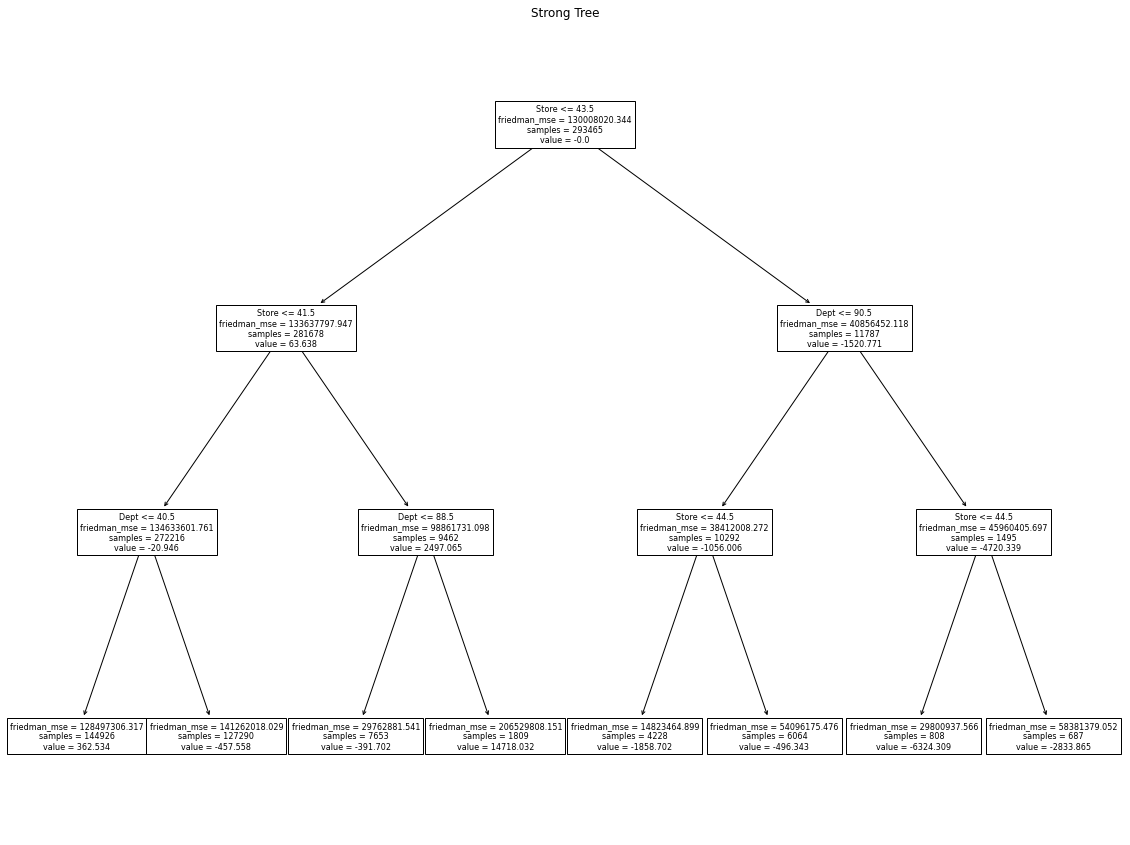

In [350]:
plt.figure(figsize=(20,15))
tree.plot_tree(model.estimators_[99,0], feature_names = mod_train.columns , max_depth = 3)
plt.title('Strong Tree')
plt.show()

In [351]:
# r2score_test
p=r2_score(test_y,y_pred)
print(p)

0.732607982782246


In [352]:
# r2score_train
q=r2_score(train_y,y_pred2)
print(q)

0.7486045107083175


In [353]:
# mean_absolute_error
r=mean_absolute_error(test_y,y_pred)
print(r)

6818.611433755175


In [354]:
# root_mean_square_error
i = np.sqrt(metrics.mean_squared_error(test_y, y_pred))

## Extreme Gradient Boosting

In [355]:
from sklearn.model_selection import KFold
KFold = KFold(n_splits=10 ,shuffle = True)


In [356]:
data_y, data_yhat,data_y2,data_yhat_2 = list(), list(), list(), list()
def Extreme_Gradient_Boosting_Model(data_y, data_yhat,data_y2,data_yhat_2,Data):
    for train_ix, test_ix in KFold.split(Data.iloc[:,0:8]):
    # get data
        train_X, test_X = Data[['Store','Dept','Temperature','Fuel_Price','Type','Size']].loc[train_ix], Data[['Store','Dept','Temperature','Fuel_Price','Type','Size']].loc[test_ix]
        train_y, test_y = Data.iloc[:,-1].loc[train_ix], Data.iloc[:,-1].loc[test_ix]    
    # fit model
        model = XGBRegressor()
        model.fit(train_X, train_y)
    # make predictions 
        yhat = model.predict(test_X)
        yhat_2 = model.predict(train_X)
    # store
        data_y.extend(test_y)
        data_yhat.extend(yhat)
        data_y2.extend(train_y)
        data_yhat_2.extend(yhat_2)

In [357]:
Extreme_Gradient_Boosting_Model(data_y, data_yhat,data_y2,data_yhat_2, Evaluate)
b = r2_score(data_y, data_yhat)
print('r2_score: %.3f' % (b))

r2_score: 0.908


In [358]:
a = r2_score(data_y2, data_yhat_2)
print('r2_score: %.3f' % (a))

r2_score: 0.915


In [359]:
c=mean_absolute_error(data_y, data_yhat)
print(c)

3301.3586540121346


In [360]:
# mean_squared_error
from sklearn import metrics
j = np.sqrt(metrics.mean_squared_error(data_y, data_yhat))
print(j)

6912.078860592616


## Elastic Net Regression


In [361]:
from sklearn.model_selection import KFold
KFold = KFold(n_splits=10 ,shuffle = True)

In [362]:
data_y, data_yhat,data_y2,data_yhat_2 = list(), list(), list(),list()
for train_ix, test_ix in KFold.split(Evaluate.iloc[:,0:8]):
# get data
    train_X, test_X = Evaluate[['Store','Dept','Temperature','Fuel_Price','Type','Size']].loc[train_ix], Evaluate[['Store','Dept','Temperature','Fuel_Price','Type','Size']].loc[test_ix]
    train_y, test_y = Evaluate.iloc[:,-1].loc[train_ix], Evaluate.iloc[:,-1].loc[test_ix]    
# fit model
    model = ElasticNet(random_state=20, alpha = 100)
    model.fit(train_X, train_y)
# make predictions 
    yhat = model.predict(test_X)
    yhat_2 = model.predict(train_X)
# store
    data_y.extend(test_y)
    data_yhat.extend(yhat)
    data_y2.extend(train_y)
    data_yhat_2.extend(yhat_2)

In [363]:
# r2_score_train
x=r2_score(data_y2, data_yhat_2)
print (x)

0.08419167041479902


In [364]:
# r2_score_test
y=r2_score(data_y, data_yhat)
print (y)

0.08416840676091841


In [365]:
# mean_absolute_error
z=mean_absolute_error(data_y, data_yhat)  
print (z)

14584.585007574564


In [366]:
# root_mean_square_error
from sklearn import metrics
k = np.sqrt(metrics.mean_squared_error(data_y, data_yhat))

# <u>Evaluation Phase</u>

## Performance Metrics

In [367]:
from prettytable import prettytable

In [368]:
# Evaluating the Performances of the Models
from prettytable import PrettyTable
myTable = PrettyTable(["Model", "mean_absolute_error", "r2_score_test", "r2_score_train","RMSE"])
myTable.add_row(["Elastic Net Regression", z, y, x,k])
myTable.add_row(["Extreme Gradient Boosting",c,b,a,j])
myTable.add_row(["Gradient Boosting Algorithm",r,p,q,i])
myTable.add_row(["Random Forest Algorithm",n, l, m,h])
print(myTable)

+-----------------------------+---------------------+---------------------+---------------------+--------------------+
|            Model            | mean_absolute_error |    r2_score_test    |    r2_score_train   |        RMSE        |
+-----------------------------+---------------------+---------------------+---------------------+--------------------+
|    Elastic Net Regression   |  14584.585007574564 | 0.08416840676091841 | 0.08419167041479902 | 21764.566273649663 |
|  Extreme Gradient Boosting  |  3301.3586540121346 |  0.9076295719464357 |  0.9154727582805164 | 6912.078860592616  |
| Gradient Boosting Algorithm |  6818.611433755175  |  0.732607982782246  |  0.7486045107083175 | 11796.113731559792 |
|   Random Forest Algorithm   |  4602.032537045952  |  0.8316537995880998 |  0.8468742083867711 | 9359.796182590591  |
+-----------------------------+---------------------+---------------------+---------------------+--------------------+


# <u>Conclusion</u>

There is a performance difference between Elastic Net Regression, Extreme Gradient Boosting, Gradient Boosting Algorithm, and Random Forest Algorithm based on the above Performance Metrics, and the most efficient model in this set is Extreme Gradient Boosting Algorithm as it learns sequentially that is it transforms from weak learners to Strong Learners by learning at each step similar to Gradient Boosting, but regular gradient boosting uses the loss function of the base model as a proxy for minimizing the error of the overall model, XGBoost uses the 2nd order derivative as an approximation.

## <u>Prediction</u>

In [369]:
# reading the test file
predict_for = pd.read_csv('test.csv')

In [370]:
# checking for null values
feature.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [371]:
# performing Imputation on the test data
feature.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday'], inplace= True, axis = 1)

In [372]:
# Replacing Type A,B,C with 0,1,2
feature['Type'].replace(['A'],0, inplace = True)
feature['Type'].replace(['B'],1, inplace = True)
feature['Type'].replace(['C'],2, inplace = True)

In [373]:
predict_for.drop(['IsHoliday'],inplace = True , axis=1)

In [374]:
predict_for['Date'] = pd.to_datetime(predict_for['Date'])

In [375]:
df_mod = pd.merge(predict_for, feature, how="inner", on=["Store", "Date"])

In [376]:
df_mod.drop(['Date'],inplace = True, axis = 1)

In [377]:
# Final DataSet
df_mod

,Store,Dept,Temperature,Fuel_Price,Type,Size
0,1,1,55.32,3.386,0,151315
1,1,2,55.32,3.386,0,151315
2,1,3,55.32,3.386,0,151315
3,1,4,55.32,3.386,0,151315
4,1,5,55.32,3.386,0,151315
...,...,...,...,...,...,...
115059,45,93,76.06,3.804,1,118221
115060,45,94,76.06,3.804,1,118221
115061,45,95,76.06,3.804,1,118221
115062,45,97,76.06,3.804,1,118221


In [378]:
data_y, data_yhat,data_y2,data_yhat_2,predict_14 = list(), list(), list(), list(), list()
# Defining the function
def Extreme_Gradient_Boosting_Model(data_y, data_yhat,data_y2,data_yhat_2,predict_14,predict_13,Data):
    for train_ix, test_ix in KFold.split(Data.iloc[:,0:8]):
    # get data
        train_X, test_X = Data[['Store','Dept','Temperature','Fuel_Price','Type','Size']].loc[train_ix], Data[['Store','Dept','Temperature','Fuel_Price','Type','Size']].loc[test_ix]
        train_y, test_y = Data.iloc[:,-1].loc[train_ix], Data.iloc[:,-1].loc[test_ix]    
    # fit model
        model = XGBRegressor()
        model.fit(train_X, train_y)
    # make predictions 
        yhat = model.predict(test_X)
        yhat_2 = model.predict(train_X)
        yhat_3 = model.predict(predict_13)
    # store
        data_y.extend(test_y)
        data_yhat.extend(yhat)
        data_y2.extend(train_y)
        data_yhat_2.extend(yhat_2)
        predict_14.append(tuple(yhat_3))

In [379]:
# calling the model function 
Extreme_Gradient_Boosting_Model(data_y, data_yhat,data_y2,data_yhat_2,predict_14,df_mod,Evaluate)

In [380]:
# creating final prediction list
Final_prediction = list()

In [381]:
# looping for mean
for j in range(0,115064):    
    Final_prediction.append(np.mean([i[j] for i in predict_14]))

In [382]:
df_mod['Weekly_Sales'] = Final_prediction

In [383]:
# Final Prediction
df_mod

,Store,Dept,Temperature,Fuel_Price,Type,Size,Weekly_Sales
0,1,1,55.32,3.386,0,151315,33627.039062
1,1,2,55.32,3.386,0,151315,53682.699219
2,1,3,55.32,3.386,0,151315,18156.542969
3,1,4,55.32,3.386,0,151315,42041.519531
4,1,5,55.32,3.386,0,151315,36682.476562
...,...,...,...,...,...,...,...
115059,45,93,76.06,3.804,1,118221,2707.665527
115060,45,94,76.06,3.804,1,118221,9493.644531
115061,45,95,76.06,3.804,1,118221,55136.074219
115062,45,97,76.06,3.804,1,118221,6248.218262
